<a href="https://colab.research.google.com/github/Miit-009/Jio-Institute/blob/main/Session_10_(12_Feb)_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

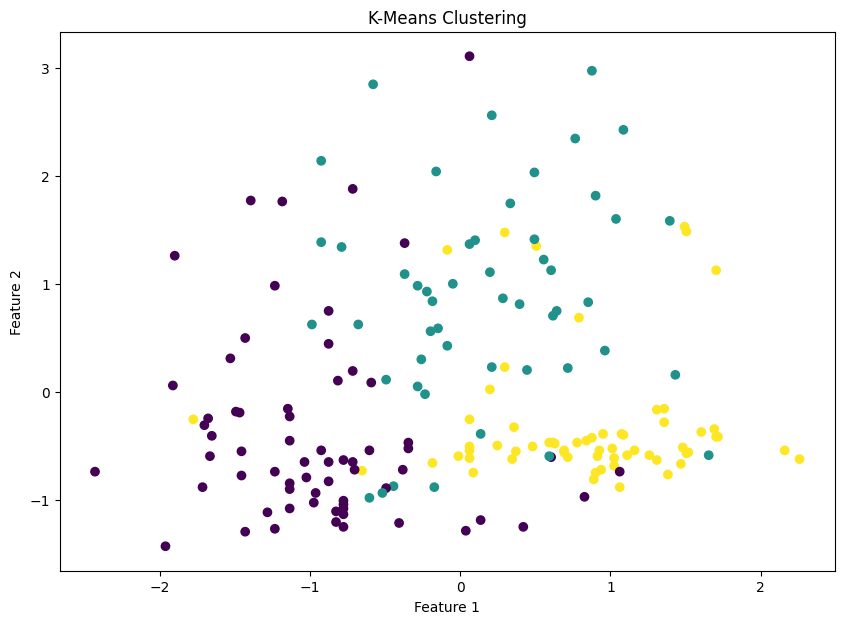

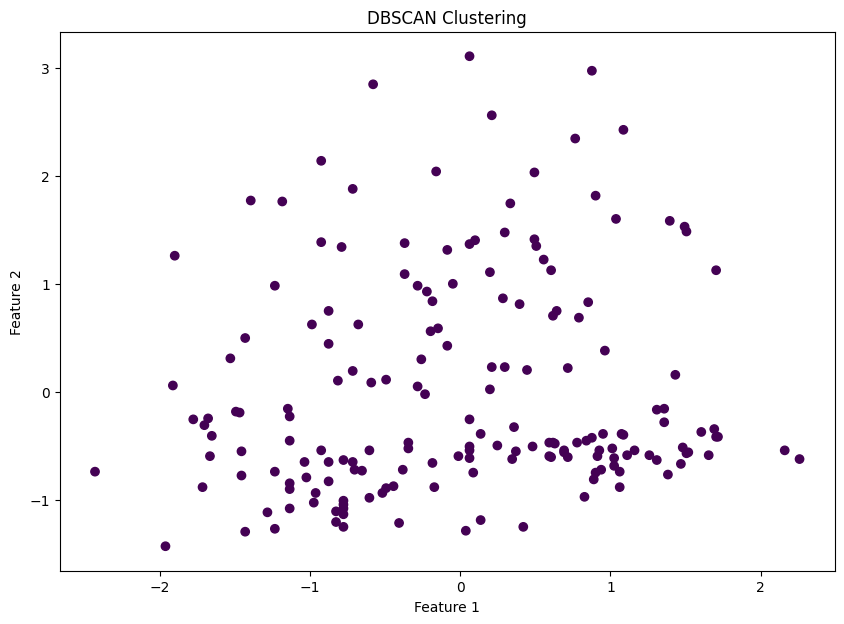

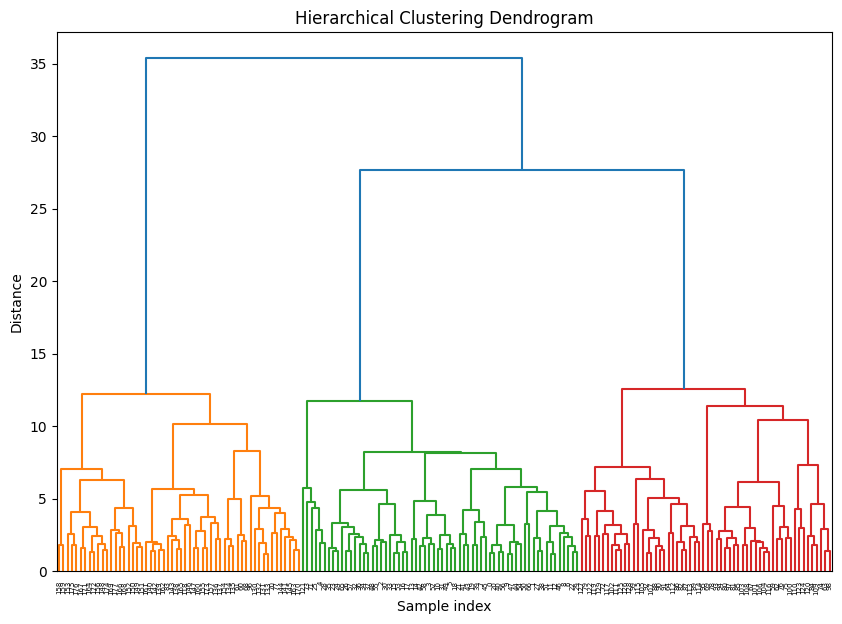

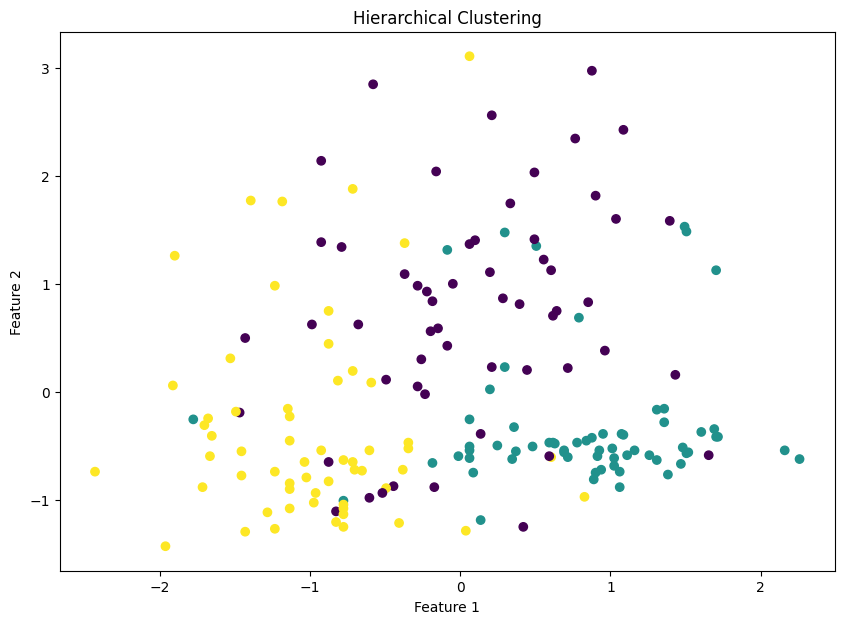

K-Means labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
DBSCAN labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Hierarchical labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel("wine_Dataset.xlsx")

# Extracting features (excluding any non-numeric columns, e.g., index columns if they exist)
# Assuming all columns are numeric, you can filter this if there are other columns
features = data.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# ---- K-Means Clustering ----
# Define the model, you can experiment with the number of clusters (k)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Plot K-Means results
plt.figure(figsize=(10, 7))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# ---- DBSCAN (Density-Based Clustering) ----
# Define the DBSCAN model with epsilon (eps) and min_samples, you can experiment with these parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Plot DBSCAN results
plt.figure(figsize=(10, 7))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# ---- Hierarchical Clustering ----
# Perform Hierarchical Clustering using linkage method
linked = linkage(scaled_data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Optionally, you can define clusters using the dendrogram (e.g., 3 clusters)
from scipy.cluster.hierarchy import fcluster
hierarchical_labels = fcluster(linked, 3, criterion='maxclust')

# Plot Hierarchical Clustering results
plt.figure(figsize=(10, 7))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Results
print(f"K-Means labels: {kmeans_labels}")
print(f"DBSCAN labels: {dbscan_labels}")
print(f"Hierarchical labels: {hierarchical_labels}")


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel("wine_Dataset.xlsx")

# Extracting features (excluding any non-numeric columns, e.g., index columns if they exist)
features = data.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# ---- K-Means Clustering ----
# Define the model, assuming 3 clusters as per your case
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Examine the centroids of the K-Means clusters
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
print("K-Means Cluster Centroids:")
print(centroids)

# ---- DBSCAN (Density-Based Clustering) ----
# Define the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# For each DBSCAN cluster (ignoring noise points -1)
unique_dbscan_labels = set(dbscan_labels) - {-1}
for label in unique_dbscan_labels:
    cluster_data = features[dbscan_labels == label]
    print(f"DBSCAN Cluster {label} mean values:")
    print(cluster_data.mean())

# ---- Hierarchical Clustering ----
# Perform Hierarchical Clustering using linkage method
linked = linkage(scaled_data, 'ward')

# Generate hierarchical labels for 3 clusters
hierarchical_labels = fcluster(linked, 3, criterion='maxclust')

# Calculate mean values for each feature in each hierarchical cluster
for cluster_id in np.unique(hierarchical_labels):
    cluster_data = features[hierarchical_labels == cluster_id]
    print(f"Hierarchical Cluster {cluster_id} mean values:")
    print(cluster_data.mean())


K-Means Cluster Centroids:
    Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  Flavanoids  \
0 -0.926072 -0.394042 -0.494517    0.170602  -0.491712 -0.075983    0.020813   
1  0.164907  0.871547  0.186898    0.524367  -0.075473 -0.979330   -1.215248   
2  0.835232 -0.303810  0.364706   -0.610191   0.577587  0.885237    0.977820   

   Nonflavanoids  Proanthocyanins     Color       Hue  Dilution   Proline  
0      -0.033534         0.058266 -0.901914  0.461804  0.270764 -0.753846  
1       0.726064        -0.779706  0.941539 -1.164789 -1.292412 -0.407088  
2      -0.562090         0.580287  0.171063  0.473984  0.779247  1.125185  
Hierarchical Cluster 1 mean values:
Alcohol             13.061607
Malic                3.166607
Ash                  2.412857
Alcalinity          21.003571
Magnesium           99.857143
Phenols              1.694286
Flavanoids           0.847857
Nonflavanoids        0.449464
Proanthocyanins      1.129286
Color                6.850179
Hue         

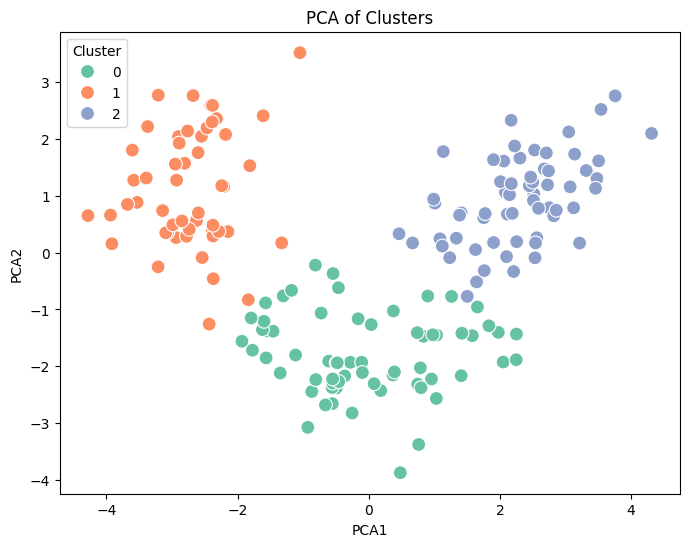

In [3]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans_labels  # or dbscan_labels / hierarchical_labels

# Visualize the PCA components and clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('PCA of Clusters')
plt.show()
